In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import mdshare
import pyemma
import mdtraj as md
from pyemma.util.contexts import settings

In [6]:
# Define structure and path files
structure_file = "MouseCysGSSG.pdb"
topology_file = "MouseCysGSSG.prmtop"
trajectory_file = "MouseCysGSSG.md1.nc"

# Load the trajectory into PyEMMA
feat = pyemma.coordinates.featurizer(structure_file)
feat.add_all()
inp = pyemma.coordinates.source(trajectory_file, features=feat)

# Check the load of the trajectory
print(f"Estructura cargada desde: {structure_file}")
print(f"Trayectoria cargada desde: {trajectory_file}")

# Load the trajectory into PyEMMA
files = [trajectory_file]
pdb = structure_file


Estructura cargada desde: MouseCysGSSG.pdb
Trayectoria cargada desde: MouseCysGSSG.md1.nc


In [7]:
# Calculate skeletal torsion characteristics
torsions_feat = pyemma.coordinates.featurizer(pdb)
torsions_feat.add_backbone_torsions(cossin=True, periodic=False)
torsions_data = pyemma.coordinates.load(files, features=torsions_feat)
labels = ['backbone\ntorsions']

# Calculate positions of skeleton atoms
positions_feat = pyemma.coordinates.featurizer(pdb)
positions_feat.add_selection(positions_feat.select_Backbone())
positions_data = pyemma.coordinates.load(files, features=positions_feat)
labels += ['backbone atom\npositions']

# Calculate distances of atoms from the skeleton
distances_feat = pyemma.coordinates.featurizer(pdb)
distances_feat.add_distances(
    distances_feat.pairs(distances_feat.select_Backbone(), excluded_neighbors=2), periodic=False)
distances_data = pyemma.coordinates.load(files, features=distances_feat)
labels += ['backbone atom\ndistances']

100%|██████████| 12/12 [01:22<00:00,  6.89s/it]                                 


In [8]:
# Check the dimension of the data
print("Dimensión de torsions_data:", torsions_data.shape[1])
print("Dimensión de positions_data:", positions_data.shape[1])
print("Dimensión de distances_data:", distances_data.shape[1])

Dimensión de torsions_data: 752
Dimensión de positions_data: 1701
Dimensión de distances_data: 160085


In [9]:
def score_cv(data, dim, lag, number_of_splits=10, validation_fraction=0.5):
    """Compute a cross-validated VAMP2 score."""
    with pyemma.util.contexts.settings(show_progress_bars=False):
        nval = int(len(data) * validation_fraction)
        scores = np.zeros(number_of_splits)
        for n in range(number_of_splits):
            ival = np.random.choice(len(data), size=nval, replace=False)
            vamp = pyemma.coordinates.vamp(
                [d for i, d in enumerate(data) if i not in ival], lag=lag, dim=dim)
            scores[n] = vamp.score([d for i, d in enumerate(data) if i in ival])
    return scores


In [10]:
# Adjust dimensions based on the actual dimensions of the data
dim_torsions = min(5, torsions_data.shape[1])
dim_positions = min(5, positions_data.shape[1])
dim_distances = min(5, distances_data.shape[1])

print(f"Dimensión utilizada para torsions_data: {dim_torsions}")
print(f"Dimensión utilizada para positions_data: {dim_positions}")
print(f"Dimensión utilizada para distances_data: {dim_distances}")


Dimensión utilizada para torsions_data: 5
Dimensión utilizada para positions_data: 5
Dimensión utilizada para distances_data: 5


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
C:\Users\User\AppData\Roa

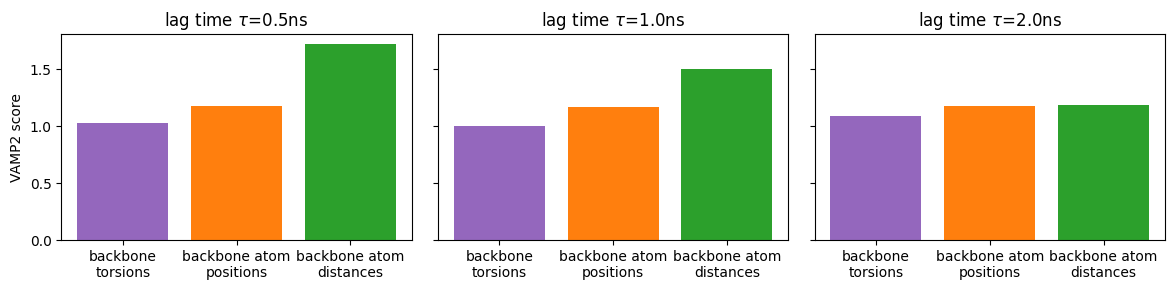

In [11]:
dim = 1

fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)
for ax, lag in zip(axes.flat, [5, 10, 20]):
    torsions_scores = score_cv(torsions_data, lag=lag, dim=dim)
    scores = [torsions_scores.mean()]
    errors = [torsions_scores.std()]
    positions_scores = score_cv(positions_data, lag=lag, dim=dim)
    scores += [positions_scores.mean()]
    errors += [positions_scores.std()]
    distances_scores = score_cv(distances_data, lag=lag, dim=dim)
    scores += [distances_scores.mean()]
    errors += [distances_scores.std()]
    ax.bar(labels, scores, yerr=errors, color=['C4', 'C1', 'C2'])
    ax.set_title(r'lag time $\tau$={:.1f}ns'.format(lag * 0.1))
    if lag == 5:
        # save for later
        vamp_bars_plot = dict(
            labels=labels, scores=scores, errors=errors, dim=dim, lag=lag)
axes[0].set_ylabel('VAMP2 score')
fig.tight_layout()

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "vamp". Called from C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py line 232. Use deeptime.decomposition.VAMP instead.
  return caller(func, *(extras + args), **kw)
C:\Users\User\AppData\Roa

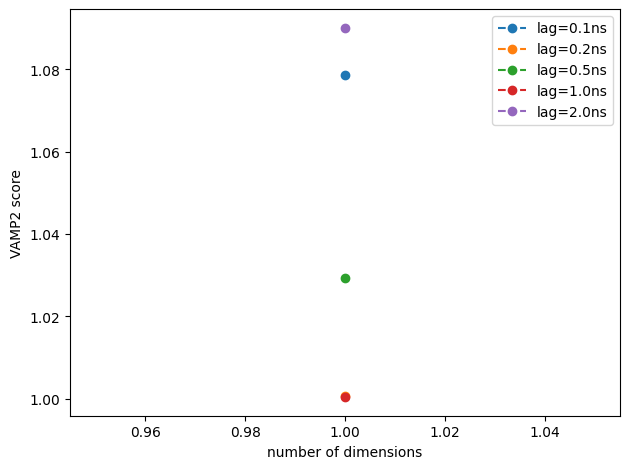

In [12]:
lags = [1, 2, 5, 10, 20]
dims = [i + 1 for i in range(1)]

fig, ax = plt.subplots()
for i, lag in enumerate(lags):
    scores_ = np.array([score_cv(torsions_data, dim, lag)
                        for dim in dims])
    scores = np.mean(scores_, axis=1)
    errors = np.std(scores_, axis=1, ddof=1)
    color = 'C{}'.format(i)
    ax.fill_between(dims, scores - errors, scores + errors, alpha=0.3, facecolor=color)
    ax.plot(dims, scores, '--o', color=color, label='lag={:.1f}ns'.format(lag * 0.1))
ax.legend()
ax.set_xlabel('number of dimensions')
ax.set_ylabel('VAMP2 score')
fig.tight_layout()

In [16]:
tica = pyemma.coordinates.tica(torsions_data, lag=5)
tica_output = tica.get_output()
tica_concatenated = np.concatenate(tica_output)
print("Shape of tica_concatenated:", tica_concatenated.shape)

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "tica". Called from C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py line 232. Use deeptime.decomposition.TICA instead.
  return caller(func, *(extras + args), **kw)


Shape of tica_concatenated: (5000, 446)


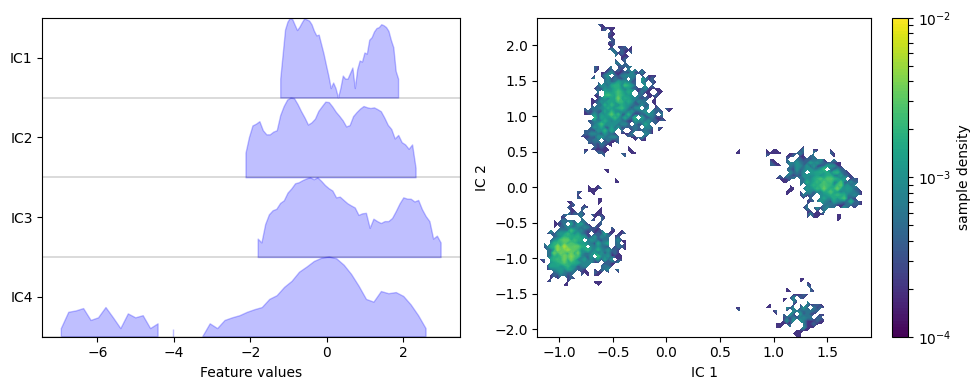

In [17]:
# Seleccionar solo las primeras 4 componentes independientes
selected_components = tica_concatenated[:, :4]

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot feature histograms
pyemma.plots.plot_feature_histograms(
    selected_components,
    ax=axes[0],
    feature_labels=['IC1', 'IC2', 'IC3', 'IC4'],
    ylog=True)

# Plot density of the first two components
pyemma.plots.plot_density(*selected_components[:, :2].T, ax=axes[1], logscale=True)
axes[1].set_xlabel('IC 1')
axes[1].set_ylabel('IC 2')
fig.tight_layout()
plt.show()

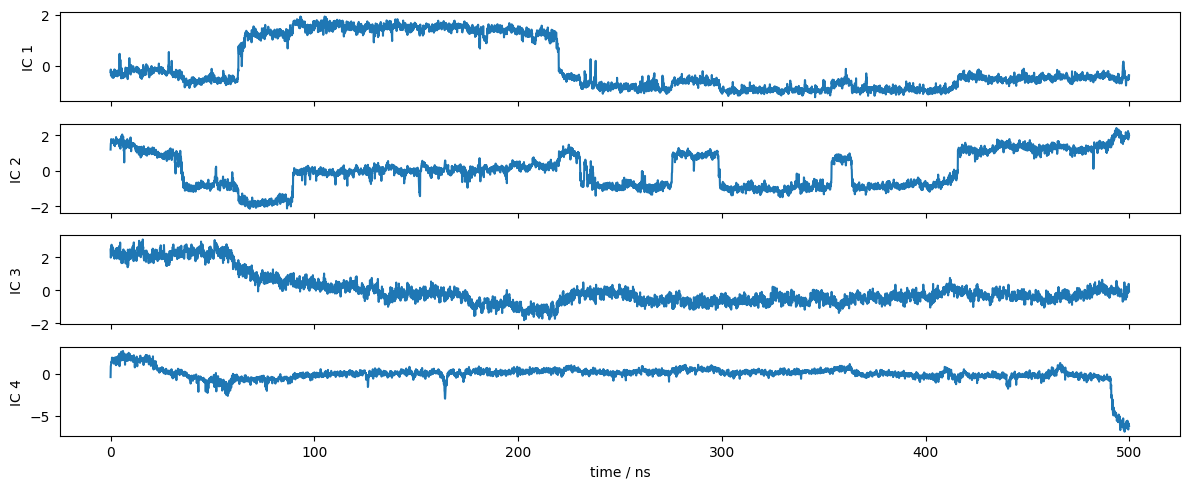

In [18]:
fig, axes = plt.subplots(4, 1, figsize=(12, 5), sharex=True)
x = 0.1 * np.arange(tica_output[0].shape[0])
for i, (ax, tic) in enumerate(zip(axes.flat, tica_output[0].T)):
    ax.plot(x, tic)
    ax.set_ylabel('IC {}'.format(i + 1))
axes[-1].set_xlabel('time / ns')
fig.tight_layout()

In [26]:
# Verificar la cantidad de datos en tica_output
lengths = [len(traj) for traj in tica_output]
n_samples = sum(lengths)
min_length = min(lengths)
print("Total number of data points in tica_output:", n_samples)
print("Minimum length of any trajectory in tica_output:", min_length)

# Ajustar n_clustercenters para que no exceda la longitud mínima de las trayectorias
n_clustercenters = [k for k in [5, 10, 30, 75, 200, 450] if k <= min_length]

if not n_clustercenters:
    raise ValueError("Not enough data points in any trajectory for the desired amount of clusters.")

scores = np.zeros((len(n_clustercenters), 5))
for n, k in enumerate(n_clustercenters):
    for m in range(5):
        with pyemma.util.contexts.settings(show_progress_bars=False):
            _cl = pyemma.coordinates.cluster_kmeans(
                tica_output, k=k, max_iter=50, stride=50)
            _msm = pyemma.msm.estimate_markov_model(_cl.dtrajs, 5)
            scores[n, m] = _msm.score_cv(
                _cl.dtrajs, n=1, score_method='VAMP2', score_k=min(10, k))

fig, ax = plt.subplots()
lower, upper = pyemma.util.statistics.confidence_interval(scores.T.tolist(), conf=0.9)
ax.fill_between(n_clustercenters, lower, upper, alpha=0.3)
ax.plot(n_clustercenters, np.mean(scores, axis=1), '-o')
ax.semilogx()
ax.set_xlabel('number of cluster centers')
ax.set_ylabel('VAMP-2 score')
fig.tight_layout()
plt.show()

Total number of data points in tica_output: 5000
Minimum length of any trajectory in tica_output: 5000


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)


10-07-24 10:45:00 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[1189] WARNING  Requested scoring rank 5 exceeds number of MSM states. Reduced to score_k = 4


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw

10-07-24 10:45:01 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[1201] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9
10-07-24 10:45:01 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[1209] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)


10-07-24 10:45:01 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[1213] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 9


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)


10-07-24 10:45:01 pyemma.msm.estimators.maximum_likelihood_msm.MaximumLikelihoodMSM[1217] WARNING  Requested scoring rank 10 exceeds number of MSM states. Reduced to score_k = 8


C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw

ValueError: Not enough data points for desired amount of clusters.

In [27]:
cluster = pyemma.coordinates.cluster_kmeans(
    tica_output, k=75, max_iter=50, stride=10, fixed_seed=1)
dtrajs_concatenated = np.concatenate(cluster.dtrajs)

C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py:232: PyEMMA_DeprecationWarning: Call to deprecated function "cluster_kmeans". Called from C:\Users\User\AppData\Roaming\Python\Python310\site-packages\decorator.py line 232. Use deeptime.clustering.KMeans instead.
  return caller(func, *(extras + args), **kw)
100%|██████████| 50/50 [00:00<00:00, 182.44it/s]


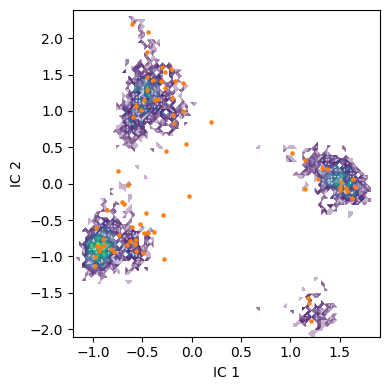

In [28]:
fig, ax = plt.subplots(figsize=(4, 4))
pyemma.plots.plot_density(
    *tica_concatenated[:, :2].T, ax=ax, cbar=False, alpha=0.3)
ax.scatter(*cluster.clustercenters[:, :2].T, s=5, c='C1')
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
fig.tight_layout()

100%|██████████| 10/10 [00:03<00:00,  3.18it/s]                        


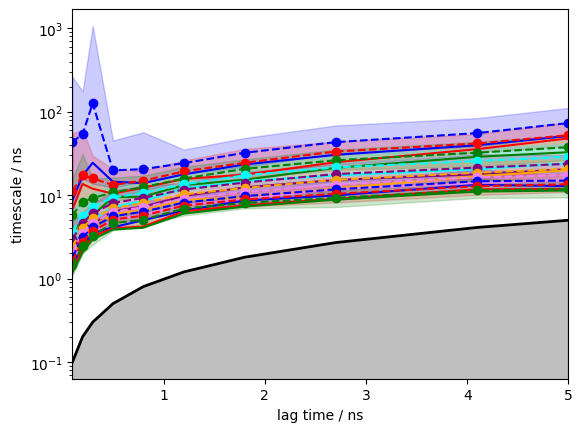

In [29]:
its = pyemma.msm.its(cluster.dtrajs, lags=50, nits=10, errors='bayes')
pyemma.plots.plot_implied_timescales(its, units='ns', dt=0.1);

In [30]:
msm = pyemma.msm.bayesian_markov_model(cluster.dtrajs, lag=5, dt_traj='0.1 ns')
print('fraction of states used = {:.2f}'.format(msm.active_state_fraction))
print('fraction of counts used = {:.2f}'.format(msm.active_count_fraction))


100%|██████████| 100/100 [00:00<00:00, 522.25it/s]                                                                    

fraction of states used = 0.92
fraction of counts used = 0.97


100%|██████████| 5/5 [00:02<00:00,  2.45it/s]                        
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\deeptime\markov\tools\analysis\_api.py:256: UserWarning: truncated eigendecomposition to contain 64 components
  warnings.warn('truncated eigendecomposition to contain %s components' % new_k, category=UserWarning)


TypeError: legend() takes 0-2 positional arguments but 3 were given

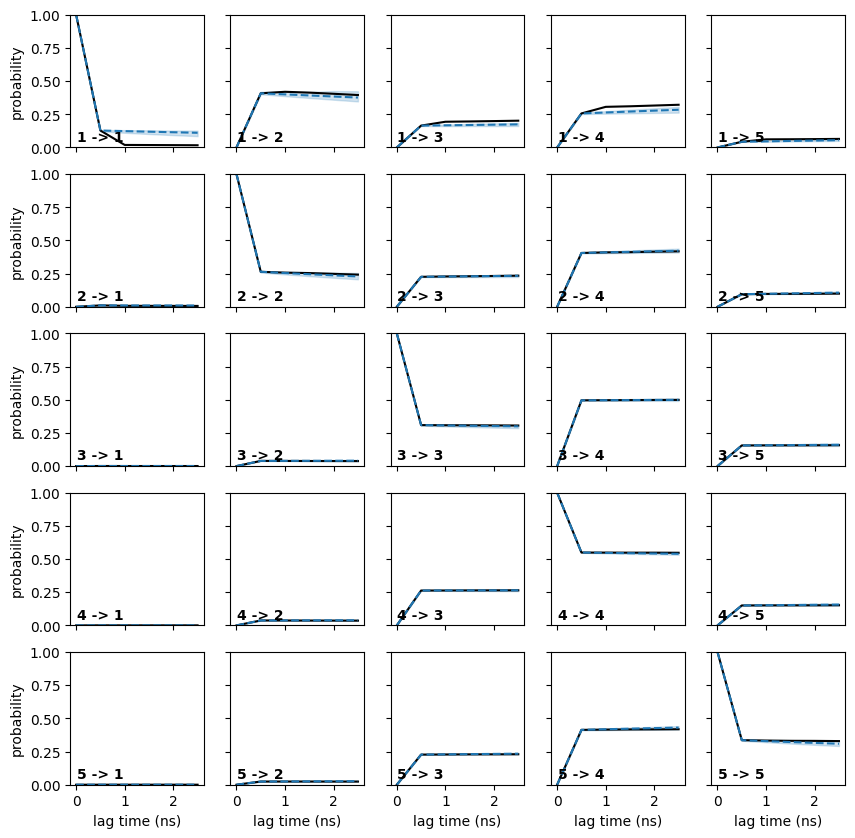

In [31]:
nstates = 5
msm.pcca(nstates)

# Realitzar el test de Chapman-Kolmogorov
cktest = msm.cktest(nstates, mlags=6)

# Visualitzar els resultats del test de Chapman-Kolmogorov
pyemma.plots.plot_cktest(cktest, dt=0.1, units='ns')
plt.show()


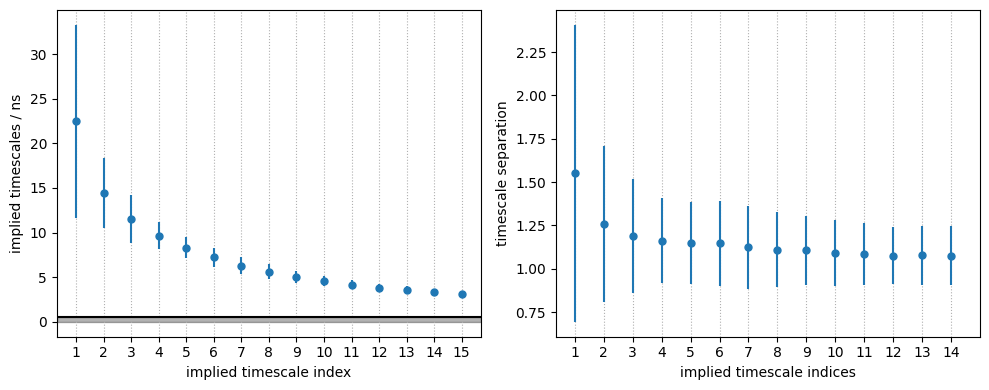

In [32]:
def its_separation_err(ts, ts_err):
    """
    Error propagation from ITS standard deviation to timescale separation.
    """
    return ts[:-1] / ts[1:] * np.sqrt(
        (ts_err[:-1] / ts[:-1])**2 + (ts_err[1:] / ts[1:])**2)


nits = 15

timescales_mean = msm.sample_mean('timescales', k=nits)
timescales_std = msm.sample_std('timescales', k=nits)

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].errorbar(
    range(1, nits + 1),
    timescales_mean,
    yerr=timescales_std,
    fmt='.', markersize=10)
axes[1].errorbar(
    range(1, nits),
    timescales_mean[:-1] / timescales_mean[1:],
    yerr=its_separation_err(
        timescales_mean,
        timescales_std),
    fmt='.',
    markersize=10,
    color='C0')

for i, ax in enumerate(axes):
    ax.set_xticks(range(1, nits + 1))
    ax.grid(True, axis='x', linestyle=':')

axes[0].axhline(msm.lag * 0.1, lw=1.5, color='k')
axes[0].axhspan(0, msm.lag * 0.1, alpha=0.3, color='k')
axes[0].set_xlabel('implied timescale index')
axes[0].set_ylabel('implied timescales / ns')
axes[1].set_xticks(range(1, nits))
""" axes[1].set_xticklabels(
    ["{:d}/{:d}".format(k, k + 1) for k in range(1, nits + 2)],
    rotation=45) """
axes[1].set_xlabel('implied timescale indices')
axes[1].set_ylabel('timescale separation')
fig.tight_layout()

Shape of msm.pi: (69,)
Max index in dtrajs_concatenated: 74
Min index in dtrajs_concatenated: 0


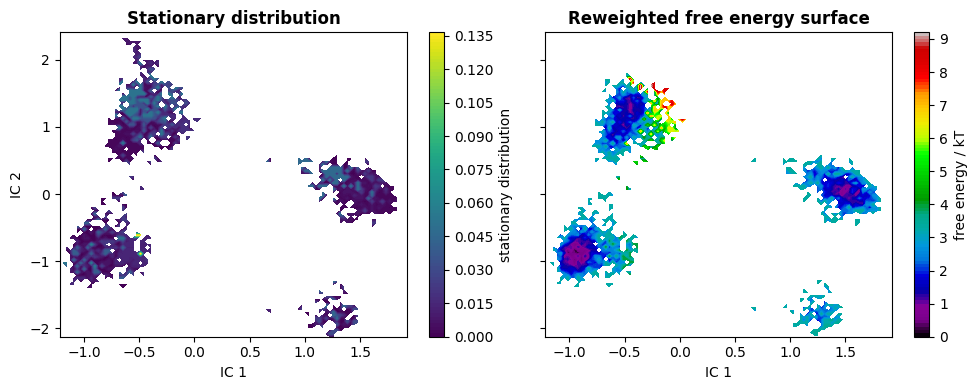

In [35]:
# Verificar los índices en dtrajs_concatenated
print(f"Shape of msm.pi: {msm.pi.shape}")
print(f"Max index in dtrajs_concatenated: {np.max(dtrajs_concatenated)}")
print(f"Min index in dtrajs_concatenated: {np.min(dtrajs_concatenated)}")

# Ajustar dtrajs_concatenated si tiene índices fuera del rango
dtrajs_concatenated = np.clip(dtrajs_concatenated, 0, len(msm.pi) - 1)

# Graficar
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
pyemma.plots.plot_contour(
    *tica_concatenated[:, :2].T,
    msm.pi[dtrajs_concatenated],
    ax=axes[0],
    mask=True,
    cbar_label='stationary distribution')
pyemma.plots.plot_free_energy(
    *tica_concatenated[:, :2].T,
    weights=np.concatenate(msm.trajectory_weights()),
    ax=axes[1],
    legacy=False)
for ax in axes.flat:
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
axes[0].set_title('Stationary distribution', fontweight='bold')
axes[1].set_title('Reweighted free energy surface', fontweight='bold')
fig.tight_layout()
plt.show()

The first eigenvector is one: True (min=0.9999999999999236, max=1.0000000000000187)


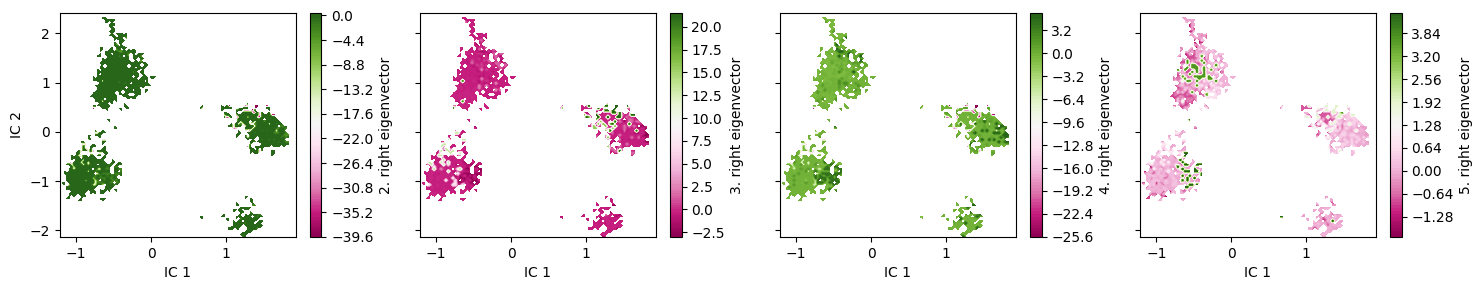

In [36]:
eigvec = msm.eigenvectors_right()
print('The first eigenvector is one: {} (min={}, max={})'.format(
    np.allclose(eigvec[:, 0], 1, atol=1e-15), eigvec[:, 0].min(), eigvec[:, 0].max()))

fig, axes = plt.subplots(1, 4, figsize=(15, 3), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *tica_concatenated[:, :2].T,
        eigvec[dtrajs_concatenated, i + 1],
        ax=ax,
        cmap='PiYG',
        cbar_label='{}. right eigenvector'.format(i + 2),
        mask=True)
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
fig.tight_layout()

In [37]:
msm.pcca(nstates)

PCCA-1321547770384:[{'P': array([[3.46153846e-01, 0.00000000e+00, 0.00000000e+00, ...,
                           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
                          [0.00000000e+00, 8.40336135e-01, 0.00000000e+00, ...,
                           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
                          [0.00000000e+00, 0.00000000e+00, 7.44680850e-01, ...,
                           0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
                          ...,
                          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
                           2.22044605e-16, 0.00000000e+00, 0.00000000e+00],
                          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
                           0.00000000e+00, 6.92307692e-01, 1.55664360e-01],
                          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
                           0.00000000e+00, 4.72190715e-02, 6.79611650e-01]]),
                    'm':

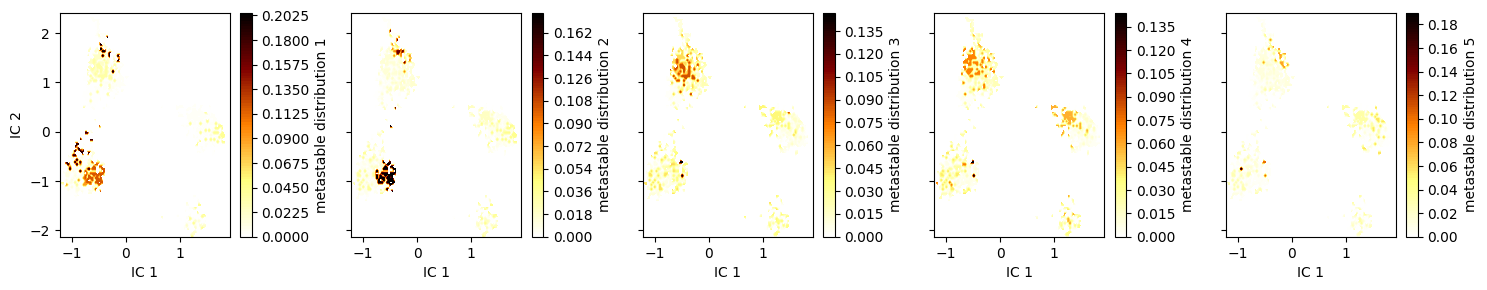

In [38]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3), sharex=True, sharey=True)
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *tica_concatenated[:, :2].T,
        msm.metastable_distributions[i][dtrajs_concatenated],
        ax=ax,
        cmap='afmhot_r',
        mask=True,
        cbar_label='metastable distribution {}'.format(i + 1))
    ax.set_xlabel('IC 1')
axes[0].set_ylabel('IC 2')
fig.tight_layout()

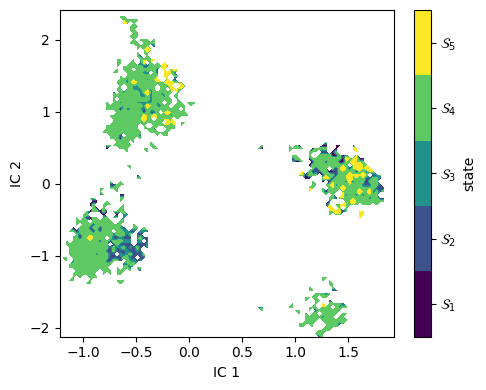

In [40]:
metastable_traj = msm.metastable_assignments[dtrajs_concatenated]

fig, ax = plt.subplots(figsize=(5, 4))
_, _, misc = pyemma.plots.plot_state_map(
    *tica_concatenated[:, :2].T, metastable_traj, ax=ax)
ax.set_xlabel('IC 1')
ax.set_ylabel('IC 2')
misc['cbar'].set_ticklabels([r'$\mathcal{S}_%d$' % (i + 1)
                             for i in range(nstates)])
fig.tight_layout()

In [41]:
pcca_samples = msm.sample_by_distributions(msm.metastable_distributions, 10)
torsions_source = pyemma.coordinates.source(files, features=torsions_feat)
pyemma.coordinates.save_trajs(
    torsions_source,
    pcca_samples,
    outfiles=['./data/pcca{}_10samples.pdb'.format(n + 1)
              for n in range(msm.n_metastable)])

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\mdtraj\formats\netcdf.py:154: UserWarning: Warning: The 'netCDF4' Python package is not installed. MDTraj is using the 'scipy' implementation to read and write netCDF files,which can be significantly slower.
For improved performance, consider installing netCDF4. See installation instructions at:
https://unidata.github.io/netcdf4-python/#quick-install
  warnings.warn(warning_message)


['./data/pcca1_10samples.pdb',
 './data/pcca2_10samples.pdb',
 './data/pcca3_10samples.pdb',
 './data/pcca4_10samples.pdb',
 './data/pcca5_10samples.pdb']

In [42]:
def visualize_metastable(samples, cmap, selection='not element H'):
    """ visualize metastable states
    Parameters
    ----------
    samples: list of mdtraj.Trajectory objects
        each element contains all samples for one metastable state.
    cmap: matplotlib.colors.ListedColormap
        color map used to visualize metastable states before.
    selection: str
        which part of the molecule to selection for visualization. For details have a look here:
        http://mdtraj.org/latest/examples/atom-selection.html#Atom-Selection-Language
    """
    import nglview
    from matplotlib.colors import to_hex

    widget = nglview.NGLWidget()
    widget.clear_representations()
    ref = samples[0]
    for i, s in enumerate(samples):
        s = s.superpose(ref, atom_indices=s.top.select('resid 2 3 and mass > 2'))
        s = s.atom_slice(s.top.select(selection))
        comp = widget.add_trajectory(s)
        comp.add_licorice()

    # this has to be done in a separate loop for whatever reason...
    x = np.linspace(0, 1, num=len(samples))
    for i, x_ in enumerate(x):
        c = to_hex(cmap(x_))
        widget.update_licorice(color=c, component=i, repr_index=i)
        widget.remove_cartoon(component=i)
    return widget

In [43]:
my_samples = [pyemma.coordinates.save_traj(files, idist, outfile=None, top=pdb)
              for idist in msm.sample_by_distributions(msm.metastable_distributions, 50)]

cmap = mpl.cm.get_cmap('viridis', nstates)
visualize_metastable(my_samples, cmap)

C:\Users\User\AppData\Local\Temp\ipykernel_8160\610718355.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('viridis', nstates)


NGLWidget(max_frame=49)

In [ ]:
print('state\tπ\t\tG/kT')
for i, s in enumerate(msm.metastable_sets):
    p = msm.pi[s].sum()
    print('{}\t{:f}\t{:f}'.format(i + 1, p, -np.log(p)))